# Project 71: Automatic Caption Generation of Images

## Authors: Oihane Cantero and Julen Etxaniz

## Supervisors: Oier Lopez de Lacalle and Eneko Agirre

## Subject: Machine Learning and Neural Networks

## Date: 15-12-2020

## Objectives: 
### 1. Implement from scratch a caption generation model that uses a CNN to condition a LSTM based language model.
### 2. Extend the basic caption generation system that incorporates an attention mechanism to the model.

## Contents:
### 1. Prepare Colab
### 2. Import Libraries
### 3. Prepare Photo Data
### 4. Prepare Text Data
### 5. Load Data
### 6. Encode Text Data
### 7. Define Model
### 8. Fit Model
### 9. Evaluate Model
### 10. Generate Captions

## References
[1] https://arxiv.org/pdf/1411.4555.pdf

[2] https://arxiv.org/pdf/1502.03044.pdf

[3] https://machinelearningmastery.com/develop-a-deep-learning-caption-generation-model-in-python/

[4] https://www.tensorflow.org/tutorials/text/image_captioning

[5] https://github.com/dabasajay/Image-Caption-Generator

# Prepare Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/1. Lauhilekoa/MLNN/Projects/Topic 3 Deep Neural Networks/neural-caption-generation/notebook

/content/drive/MyDrive/Ingeniaritza Informatikoa/4. Maila/1. Lauhilekoa/MLNN/Projects/Topic 3 Deep Neural Networks/neural-caption-generation/notebook


In [ ]:
%cd /content/drive/MyDrive/4/MLNN/P3/neural-caption-generation/notebook

/content/drive/.shortcut-targets-by-id/1yKqinuPu4oBVyhJ-8IMgknNyE2cmqrcs/neural-caption-generation/notebook


# Import Libraries



Prepare Photo Data

In [ ]:
from os import listdir
from os.path import isfile
from pickle import dump
from tqdm import tqdm
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

Prepare Text Data

In [ ]:
import string

Load Data

In [ ]:
from pickle import load

Encode Text Data

In [ ]:
from keras.preprocessing.text import Tokenizer

Define Model

In [ ]:
from keras.utils import plot_model
from keras.models import Model
from keras.models import load_model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.layers import RepeatVector, TimeDistributed, concatenate, Bidirectional

Fit Model

In [ ]:
import numpy as np
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

Evaluate Model

In [ ]:
from numpy import argmax, argsort
from nltk.translate.bleu_score import corpus_bleu

Generate Captions

In [ ]:
from IPython.display import Image, display

# Prepare Photo Data
Two different models to extract image features: VGG16 and InceptionV3.

In [ ]:
# preprocess the image for the model
def preprocess_image(filename, image_size):
    image = load_img(filename, target_size=(image_size, image_size))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the model
    image = preprocess_input(image)
    return image

In [ ]:
# extract features from each photo in the directory
def extract_features(directory, model, image_size):
	# extract features from each photo
	features = dict()
	for name in tqdm(listdir(directory), position=0, leave=True):
		# load an image from file
		filename = directory + '/' + name
		# preprocess the image for the model
		image = preprocess_image(filename, image_size)
		# get features
		feature = model.predict(image, verbose=0)
		# get image id
		image_id = name.split('.')[0]
		# store feature
		features[image_id] = feature
	return features

## VGG16 Model

In [ ]:
# cnn VGG16 model
def cnn_vgg16():
    # load the model
    model = VGG16()
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # summarize
    print(model.summary())
    plot_model(model, to_file='models/cnn_vgg16.png', show_shapes=True)
    display(Image('models/cnn_vgg16.png'))
    return model

553467904/553467096 [==============================] - 3s 0us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_____________________________________________________

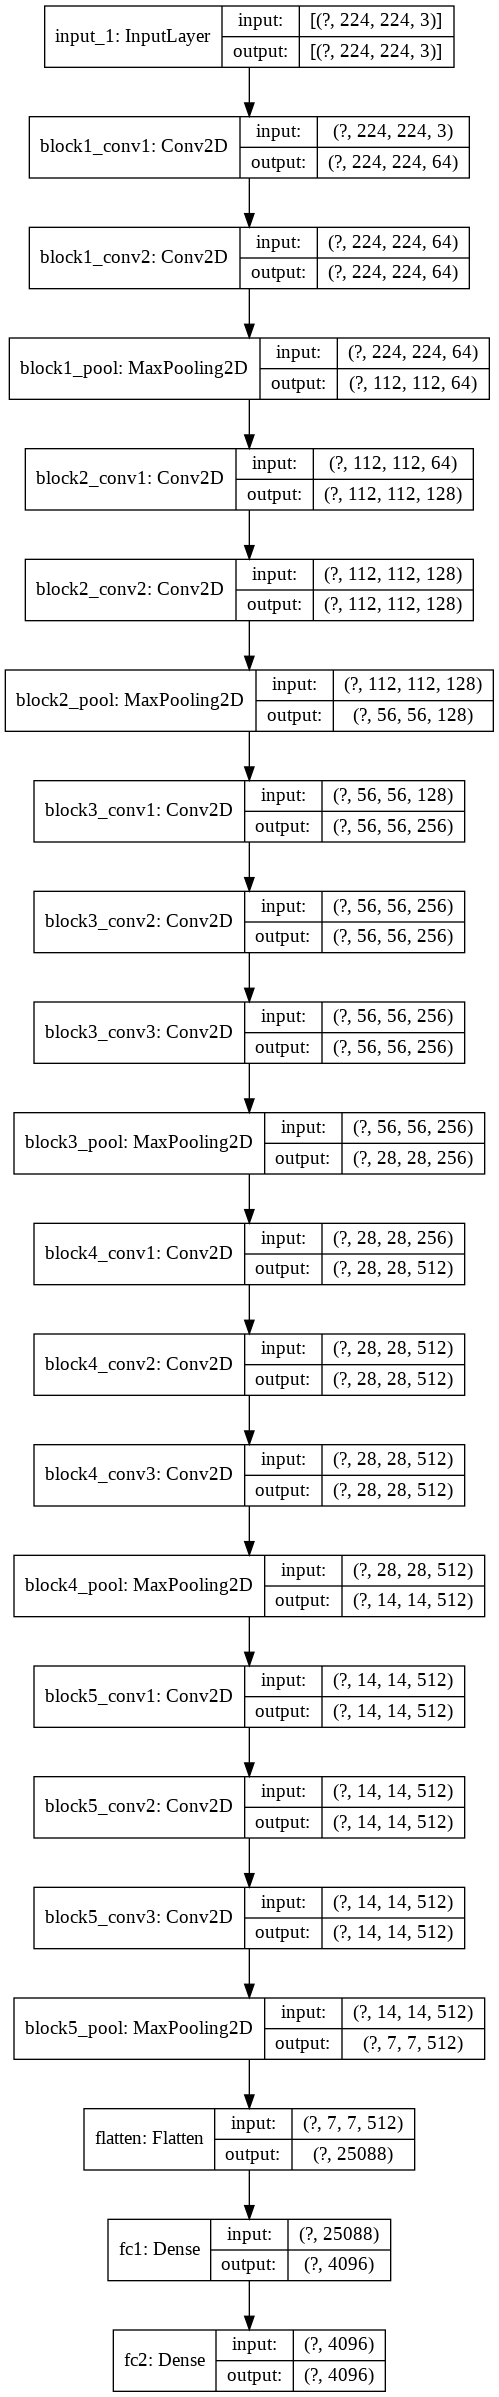

In [ ]:
# get cnn vgg16 model
cnn_vgg16 = cnn_vgg16()

In [ ]:
from keras.applications.vgg16 import preprocess_input
# extract features from all images
directory = 'Flickr8k_Dataset'
features = extract_features(directory, cnn_vgg16, 224)
print('Extracted Features: %d' % len(features))

In [ ]:
# save to file
filename = 'files/features.pkl'
if not isfile(filename):
	dump(features, open(filename, 'wb'))

## InceptionV3 Model

In [ ]:
# cnn InceptionV3 model
def cnn_inceptionv3():
    # load the model
    model = InceptionV3(weights='imagenet')
    # re-structure the model
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    # summarize
    print(model.summary())
    plot_model(model, to_file='models/cnn_inceptionv3.png', show_shapes=True)
    display(Image('models/cnn_inceptionv3.png'))
    return model

In [ ]:
# get cnn inceptionv3 model
cnn_inceptionv3 = cnn_inceptionv3()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
from keras.applications.inception_v3 import preprocess_input
# extract features from all images
directory = 'Flickr8k_Dataset'
features = extract_features(directory, cnn_inceptionv3, 299)
print('Extracted Features: %d' % len(features))

100%|██████████| 8103/8103 [39:50<00:00,  3.39it/s]

Extracted Features: 8103


In [ ]:
# save to file
filename = 'files/features_inceptionv3.pkl'
if not isfile(filename):
	dump(features, open(filename, 'wb'))

# Prepare Text Data

In [ ]:
# load doc into memory
def load_doc(filename):
	# open the file as read only
	file = open(filename, 'r')
	# read all text
	text = file.read()
	# close the file
	file.close()
	return text

In [ ]:
# extract descriptions for images
def load_descriptions(doc):
	mapping = dict()
	# process lines
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		if len(line) < 2:
			continue
		# take the first token as the image id, the rest as the description
		image_id, image_desc = tokens[0], tokens[1:]
		# remove filename from image id
		image_id = image_id.split('.')[0]
		# convert description tokens back to string
		image_desc = ' '.join(image_desc)
		# create the list if needed
		if image_id not in mapping:
			mapping[image_id] = list()
		# store description
		mapping[image_id].append(image_desc)
	return mapping

In [ ]:
def clean_descriptions(descriptions):
	# prepare translation table for removing punctuation
	table = str.maketrans('', '', string.punctuation)
	for key, desc_list in descriptions.items():
		for i in range(len(desc_list)):
			desc = desc_list[i]
			# tokenize
			desc = desc.split()
			# convert to lower case
			desc = [word.lower() for word in desc]
			# remove punctuation from each token
			desc = [w.translate(table) for w in desc]
			# remove hanging 's' and 'a'
			desc = [word for word in desc if len(word)>1]
			# remove tokens with numbers in them
			desc = [word for word in desc if word.isalpha()]
			# store as string
			desc_list[i] =  ' '.join(desc)

In [ ]:
# convert the loaded descriptions into a vocabulary of words
def to_vocabulary(descriptions):
	# build a list of all description strings
	all_desc = set()
	for key in descriptions.keys():
		[all_desc.update(d.split()) for d in descriptions[key]]
	return all_desc

In [ ]:
# save descriptions to file, one per line
def save_descriptions(descriptions, filename):
	lines = list()
	for key, desc_list in descriptions.items():
		for desc in desc_list:
			lines.append(key + ' ' + desc)
	data = '\n'.join(lines)
	file = open(filename, 'w')
	file.write(data)
	file.close()

In [ ]:
filename = 'Flickr8k_text/Flickr8k.token.txt'
# load descriptions
doc = load_doc(filename)
# parse descriptions
descriptions = load_descriptions(doc)
print('Loaded: %d ' % len(descriptions))
# clean descriptions
clean_descriptions(descriptions)
# summarize vocabulary
vocabulary = to_vocabulary(descriptions)
print('Vocabulary Size: %d' % len(vocabulary))
# save to file
save_descriptions(descriptions, 'files/descriptions.txt')

Loaded: 8092 
Vocabulary Size: 8763


# Load Data

In [ ]:
# load a pre-defined list of photo identifiers
def load_set(filename):
	doc = load_doc(filename)
	dataset = list()
	# process line by line
	for line in doc.split('\n'):
		# skip empty lines
		if len(line) < 1:
			continue
		# get the image identifier
		identifier = line.split('.')[0]
		dataset.append(identifier)
	return set(dataset)

In [ ]:
# load clean descriptions into memory
def load_clean_descriptions(filename, dataset):
	# load document
	doc = load_doc(filename)
	descriptions = dict()
	for line in doc.split('\n'):
		# split line by white space
		tokens = line.split()
		# split id from description
		image_id, image_desc = tokens[0], tokens[1:]
		# skip images not in the set
		if image_id in dataset:
			# create list
			if image_id not in descriptions:
				descriptions[image_id] = list()
			# wrap description in tokens
			desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
			# store
			descriptions[image_id].append(desc)
	return descriptions

In [ ]:
# load photo features
def load_photo_features(filename, dataset):
	# load all features
	all_features = load(open(filename, 'rb'))
	# filter features
	features = {k: all_features[k] for k in dataset}
	return features

## Train Data

In [ ]:
# load training dataset (6K)
filename = 'Flickr8k_text/Flickr_8k.trainImages.txt'
train = load_set(filename)
print('Dataset: %d' % len(train))
# descriptions
train_descriptions = load_clean_descriptions('files/descriptions.txt', train)
print('Descriptions: train=%d' % len(train_descriptions))
# photo features
train_features = load_photo_features('files/features_inceptionv3.pkl', train)
print('Photos: train=%d' % len(train_features))

Dataset: 6000
Descriptions: train=6000
Photos: train=6000


## Validation Data

In [ ]:
# load val dataset
filename = 'Flickr8k_text/Flickr_8k.devImages.txt'
val = load_set(filename)
print('Dataset: %d' % len(val))
# descriptions
val_descriptions = load_clean_descriptions('files/descriptions.txt', val)
print('Descriptions: val=%d' % len(val_descriptions))
# photo features
val_features = load_photo_features('files/features_inceptionv3.pkl', val)
print('Photos: val=%d' % len(val_features))

Dataset: 1000
Descriptions: val=1000
Photos: val=1000


## Test Data

In [ ]:
# load test set
filename = 'Flickr8k_text/Flickr_8k.testImages.txt'
test = load_set(filename)
print('Dataset: %d' % len(test))
# descriptions
test_descriptions = load_clean_descriptions('files/descriptions.txt', test)
print('Descriptions: test=%d' % len(test_descriptions))
# photo features
test_features = load_photo_features('files/features_inceptionv3.pkl', test)
print('Photos: test=%d' % len(test_features))

Dataset: 1000
Descriptions: test=1000
Photos: test=1000


# Encode Text Data

In [ ]:
# covert a dictionary of clean descriptions to a list of descriptions
def to_lines(descriptions):
	all_desc = list()
	for key in descriptions.keys():
		[all_desc.append(d) for d in descriptions[key]]
	return all_desc

In [ ]:
# fit a tokenizer given caption descriptions
def create_tokenizer(descriptions):
	lines = to_lines(descriptions)
	tokenizer = Tokenizer()
	tokenizer.fit_on_texts(lines)
	return tokenizer

In [ ]:
# calculate the length of the description with the most words
def max_length(descriptions):
	lines = to_lines(descriptions)
	return max(len(d.split()) for d in lines)

In [ ]:
# prepare tokenizer
tokenizer = create_tokenizer(train_descriptions)
# save the tokenizer
filename = 'files/tokenizer.pkl'
if not isfile(filename):
	dump(tokenizer, open(filename, 'wb'))
# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# determine the maximum sequence length
max_length = max_length(train_descriptions)
print('Description Length: %d' % max_length)

Vocabulary Size: 7579
Description Length: 34


# Define Model

## No Attention

In [ ]:
# define the captioning model
def rnn_model_1(vocab_size, max_length, embedding_size, units, input_size):
    # feature extractor model
    inputs1 = Input(shape=(input_size,))
    fe1 = Dropout(0.5)(inputs1)
    fe2 = Dense(embedding_size, activation='relu')(fe1)
    # sequence model
    inputs2 = Input(shape=(max_length,))
    se1 = Embedding(vocab_size, embedding_size, mask_zero=True)(inputs2)
    se2 = Dropout(0.5)(se1)
    se3 = LSTM(units)(se2)
    # decoder model
    decoder1 = add([fe2, se3])
    decoder2 = Dense(units, activation='relu')(decoder1)
    outputs = Dense(vocab_size, activation='softmax')(decoder2)
    # tie it together [image, seq] [word]
    model = Model(inputs=[inputs1, inputs2], outputs=outputs)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='models/rnn_model_1.png', show_shapes=True)
    display(Image('models/rnn_model_1.png'))
    return model

Model: "functional_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_15 (InputLayer)           [(None, 4096)]       0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 34, 256)      1940224     input_16[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 4096)         0           input_15[0][0]                   
______________________________________________________________________________________

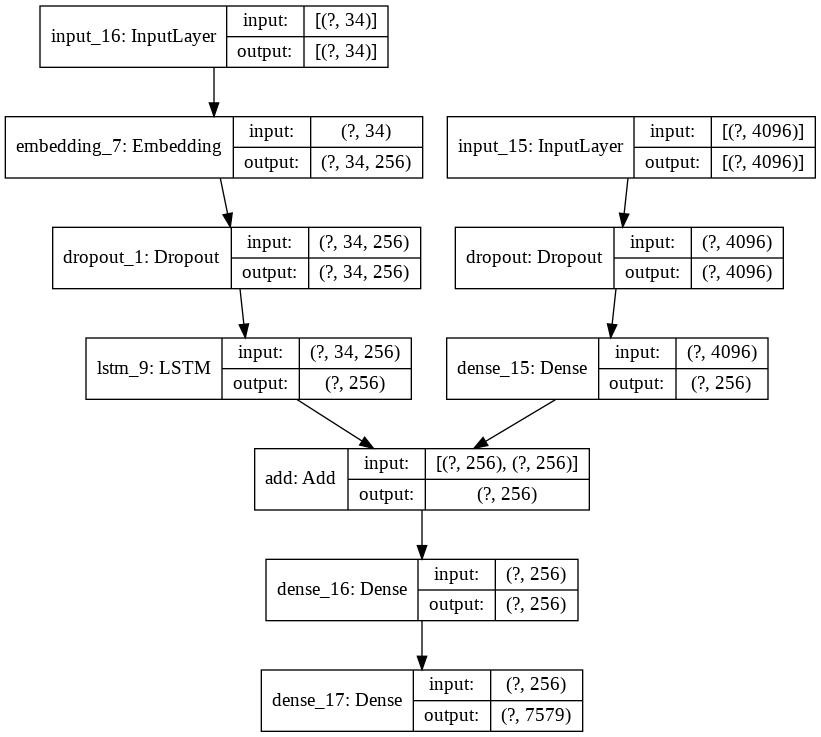

In [ ]:
# define the model
embedding_size = 256
units = 256
input_size = 4096
model = rnn_model_1(vocab_size, max_length, embedding_size, units, input_size)

## No Attention 2

In [ ]:
# define the captioning model
def rnn_model_2(vocab_size, max_length, embedding_size, units, input_size):
    image_input = Input(shape=(input_size,))
    image_model_1 = Dense(embedding_size, activation='relu')(image_input)
    image_model = RepeatVector(max_length)(image_model_1)

    caption_input = Input(shape=(max_length,))
    # mask_zero: We zero pad inputs to the same length, the zero mask ignores those inputs. E.g. it is an efficiency.
    caption_model_1 = Embedding(vocab_size, embedding_size, mask_zero=True)(caption_input)
    # Since we are going to predict the next word using the previous words
    # (length of previous words changes with every iteration over the caption), we have to set return_sequences = True.
    caption_model_2 = LSTM(units, return_sequences=True)(caption_model_1)
    # caption_model = TimeDistributed(Dense(embedding_size, activation='relu'))(caption_model_2)
    caption_model = TimeDistributed(Dense(embedding_size))(caption_model_2)

    # Merging the models and creating a softmax classifier
    final_model_1 = concatenate([image_model, caption_model])
    # final_model_2 = LSTM(units, return_sequences=False)(final_model_1)
    final_model_2 = Bidirectional(LSTM(units, return_sequences=False))(final_model_1)
    # final_model_3 = Dense(units, activation='relu')(final_model_2)
    # final_model = Dense(vocab_size, activation='softmax')(final_model_3)
    final_model = Dense(vocab_size, activation='softmax')(final_model_2)

    model = Model(inputs=[image_input, caption_input], outputs=final_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    # model.compile(loss='categorical_crossentropy', optimizer='rmsprop')
    # summarize model
    print(model.summary())
    plot_model(model, to_file='models/rnn_model_2.png', show_shapes=True)
    display(Image('models/rnn_model_2.png'))
    return model

Model: "functional_17"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           [(None, 34)]         0                                            
__________________________________________________________________________________________________
input_43 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding_17 (Embedding)        (None, 34, 256)      1940224     input_44[0][0]                   
__________________________________________________________________________________________________
dense_35 (Dense)                (None, 256)          524544      input_43[0][0]                   
______________________________________________________________________________________

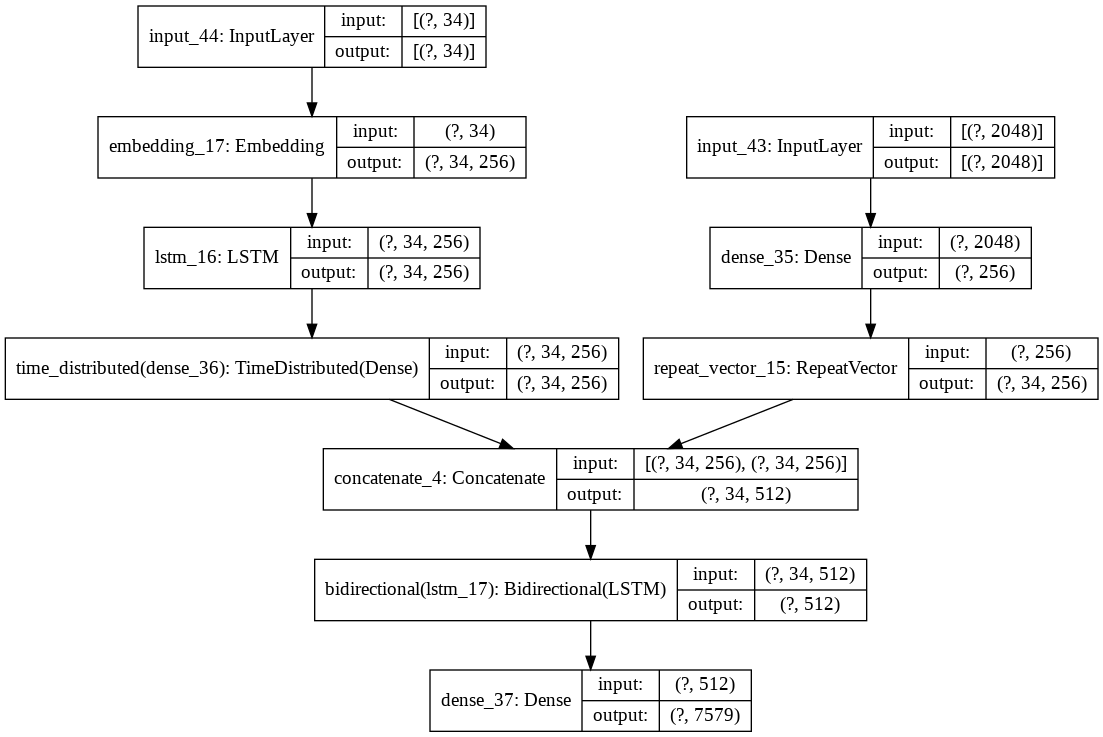

In [ ]:
# define the model
embedding_size = 256
units = 256
input_size = 2048 # 4096
model = rnn_model_2(vocab_size, max_length, embedding_size, units, input_size)

## Attention

In [ ]:
from keras.layers import AdditiveAttention
# https://keras.io/api/layers/attention_layers/additive_attention/
# https://towardsdatascience.com/light-on-math-ml-attention-with-keras-dc8dbc1fad39
# https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
# https://medium.com/swlh/image-captioning-using-attention-mechanism-f3d7fc96eb0e
# https://github.com/SubhamIO/Image-Captioning-using-Attention-Mechanism-Local-Attention-and-Global-Attention-
def rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size):
    image_input = Input(shape=(input_size,))
    image_model_1 = Dense(embedding_size, activation='relu')(image_input)
    image_model = RepeatVector(max_length)(image_model_1)

    caption_input = Input(shape=(max_length,))
    caption_model_1 = Embedding(vocab_size, embedding_size, mask_zero=True)(caption_input)
    caption_model = LSTM(256, return_sequences=True)(caption_model_1)

    attention = AdditiveAttention()([image_model, caption_model])
    decoder_concat_input = concatenate([image_model, attention])
    
    final_model_1 = Bidirectional(LSTM(256, return_sequences=False))(decoder_concat_input)
    final_model = Dense(vocab_size, activation='softmax')(final_model_1)

    model = Model(inputs=[image_input, caption_input], outputs=final_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='models/rnn_model_attention.png', show_shapes=True)
    display(Image('models/rnn_model_attention.png'))
    return model

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_47 (InputLayer)           [(None, 2048)]       0                                            
__________________________________________________________________________________________________
input_48 (InputLayer)           [(None, 34)]         0                                            
__________________________________________________________________________________________________
dense_40 (Dense)                (None, 256)          524544      input_47[0][0]                   
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 34, 256)      1940224     input_48[0][0]                   
______________________________________________________________________________________

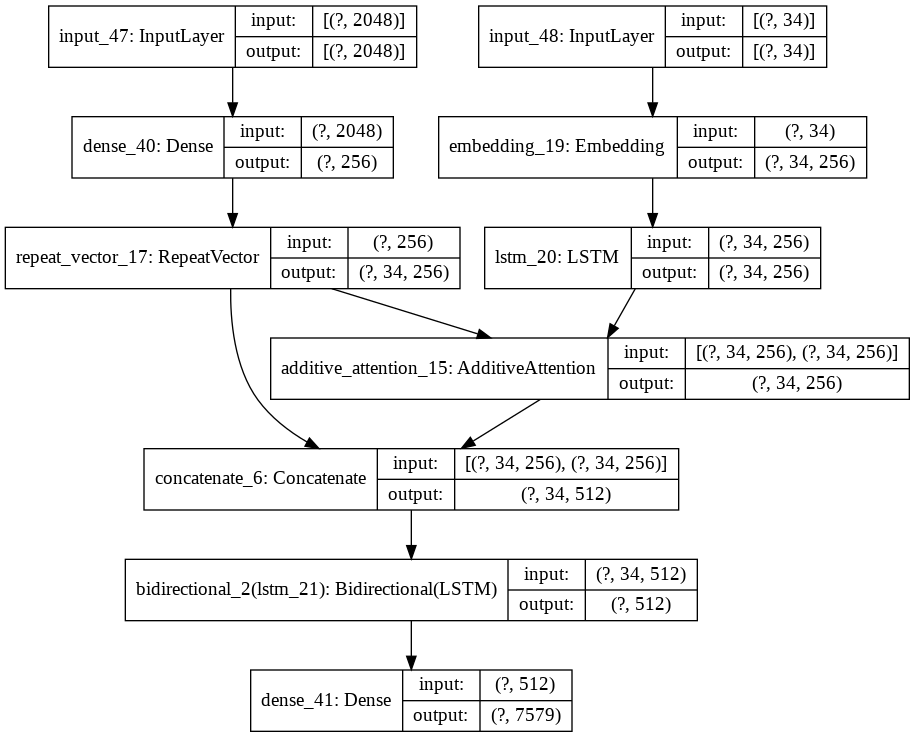

In [ ]:
embedding_size = 256
units = 512
input_size = 2048
model = rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size)

In [ ]:
from keras.layers import AdditiveAttention
# https://keras.io/api/layers/attention_layers/additive_attention/
# https://towardsdatascience.com/light-on-math-ml-attention-with-keras-dc8dbc1fad39
# https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
# https://medium.com/swlh/image-captioning-using-attention-mechanism-f3d7fc96eb0e
def rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size):
    image_input = Input(shape=(input_size,))
    image_model_1 = Dense(embedding_size, activation='relu')(image_input)
    image_model = RepeatVector(max_length)(image_model_1)

    caption_input = Input(shape=(max_length,))
    caption_model_1 = Embedding(vocab_size, embedding_size, mask_zero=True)(caption_input)
    caption_model = LSTM(256, return_sequences=True)(caption_model_1)

    attention = AdditiveAttention()([image_model, caption_model])
    decoder_concat_input = concatenate([image_model, attention])
    
    final_model_1 = Bidirectional(LSTM(256, return_sequences=False))(decoder_concat_input)
    final_model_2 = Dense(units, activation='relu')(final_model_1)
    final_model = Dense(vocab_size, activation='softmax')(final_model_2)

    model = Model(inputs=[image_input, caption_input], outputs=final_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='models/rnn_model_attention.png', show_shapes=True)
    display(Image('models/rnn_model_attention.png'))
    return model

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          524544      input_1[0][0]                    
__________________________________________________________________________________________________
embedding (Embedding)           (None, 34, 256)      1940224     input_2[0][0]                    
_______________________________________________________________________________________

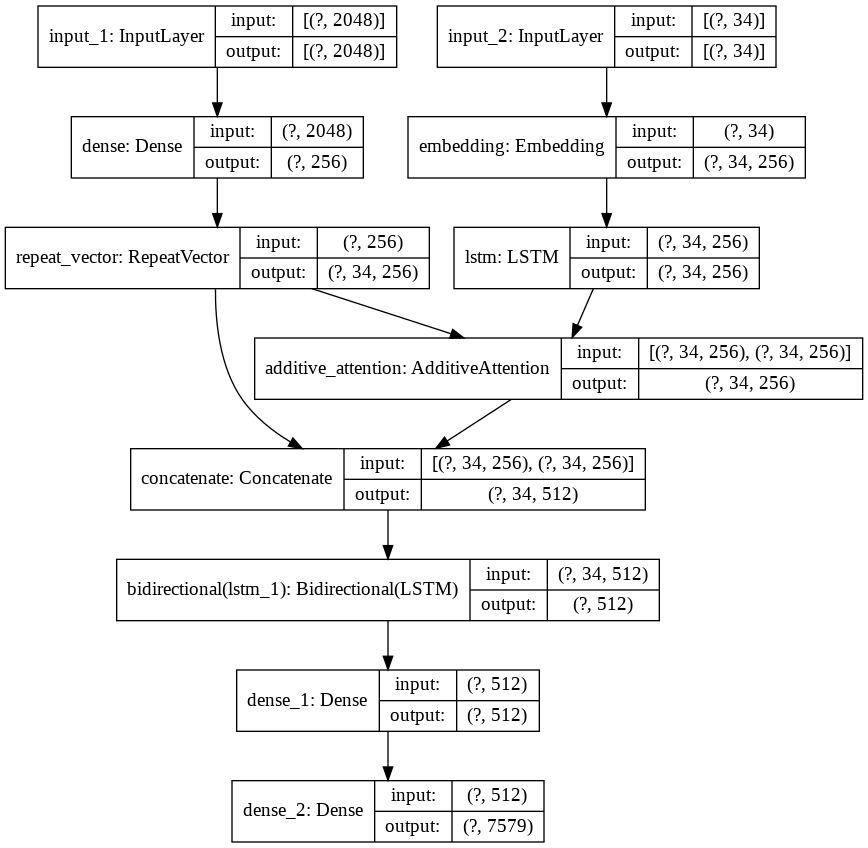

In [ ]:
embedding_size = 256
units = 512
input_size = 2048
model = rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size)

In [ ]:
from keras.layers import AdditiveAttention
# https://keras.io/api/layers/attention_layers/additive_attention/
# https://towardsdatascience.com/light-on-math-ml-attention-with-keras-dc8dbc1fad39
# https://machinelearningmastery.com/encoder-decoder-attention-sequence-to-sequence-prediction-keras/
# https://medium.com/swlh/image-captioning-using-attention-mechanism-f3d7fc96eb0e
def rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size):
    image_input = Input(shape=(input_size,))
    image_model_1 = Dense(embedding_size, activation='relu')(image_input)
    image_model = RepeatVector(max_length)(image_model_1)

    caption_input = Input(shape=(max_length,))
    caption_model = Embedding(vocab_size, embedding_size, mask_zero=True)(caption_input)

    attention = AdditiveAttention()([image_model, caption_model])
    decoder_concat_input = concatenate([attention, caption_model])
    
    final_model_1 = LSTM(units)(decoder_concat_input)
    final_model_2 = Dense(units, activation='relu')(final_model_1)
    final_model = Dense(vocab_size, activation='softmax')(final_model_2)

    model = Model(inputs=[image_input, caption_input], outputs=final_model)
    model.compile(loss='categorical_crossentropy', optimizer='adam')

    # summarize model
    print(model.summary())
    plot_model(model, to_file='models/rnn_model_attention.png', show_shapes=True)
    display(Image('models/rnn_model_attention.png'))
    return model

In [ ]:
from keras.backend import clear_session
clear_session()

Model: "functional_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 2048)]       0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 256)          524544      input_7[0][0]                    
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 34)]         0                                            
__________________________________________________________________________________________________
repeat_vector_3 (RepeatVector)  (None, 34, 256)      0           dense_7[0][0]                    
_______________________________________________________________________________________

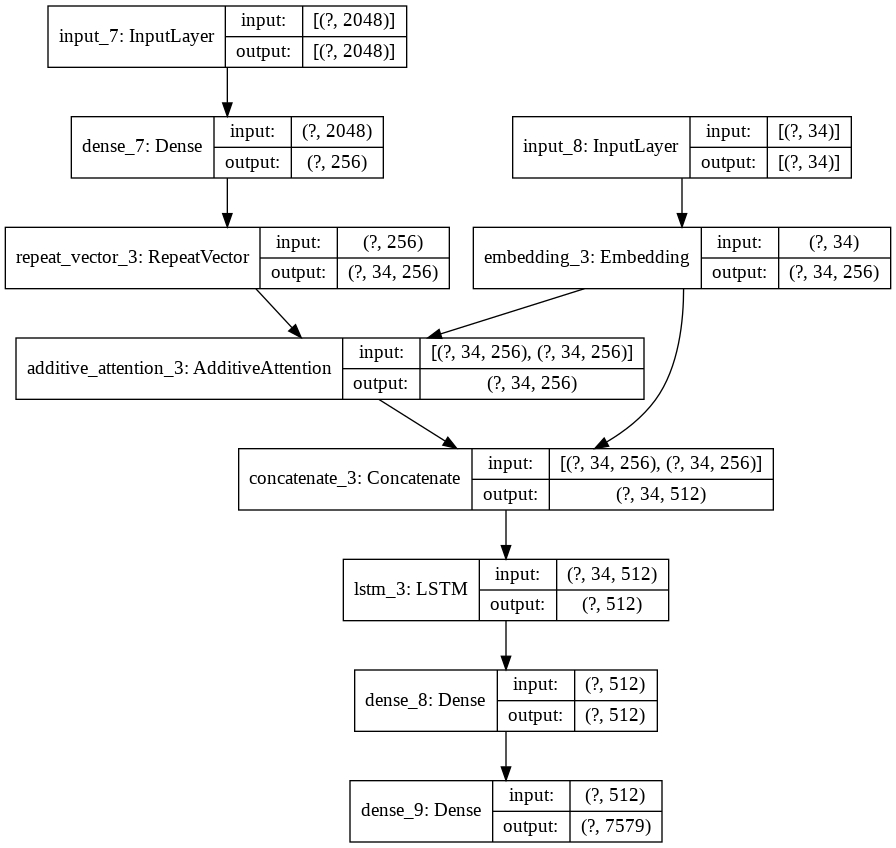

In [ ]:
embedding_size = 256
units = 512
input_size = 2048
model = rnn_model_attention(vocab_size, max_length, embedding_size, units, input_size)

# Fit Model

In [ ]:
# Create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, captions_list, image):
	# X1 : input for image features
	# X2 : input for text features
	# y  : output word
	X1, X2, y = list(), list(), list()
	vocab_size = len(tokenizer.word_index) + 1
	# Walk through each caption for the image
	for caption in captions_list:
		# Encode the sequence
		seq = tokenizer.texts_to_sequences([caption])[0]
		# Split one sequence into multiple X,y pairs
		for i in range(1, len(seq)):
			# Split into input and output pair
			in_seq, out_seq = seq[:i], seq[i]
			# Pad input sequence
			in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
			# Encode output sequence
			out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
			# Store
			X1.append(image)
			X2.append(in_seq)
			y.append(out_seq)
	return X1, X2, y

In [ ]:
# Data generator, intended to be used in a call to model.fit()
def data_generator(images, captions, tokenizer, max_length, batch_size, random_seed):
	# Setting random seed for reproducibility of results
	random.seed(random_seed)
	# Image ids
	image_ids = list(captions.keys())
	_count=0
	assert batch_size<= len(image_ids), 'Batch size must be less than or equal to {}'.format(len(image_ids))
	while True:
		if _count >= len(image_ids):
			# Generator exceeded or reached the end so restart it
			_count = 0
		# Batch list to store data
		input_img_batch, input_sequence_batch, output_word_batch = list(), list(), list()
		for i in range(_count, min(len(image_ids), _count+batch_size)):
			# Retrieve the image id
			image_id = image_ids[i]
			# Retrieve the image features
			image = images[image_id][0]
			# Retrieve the captions list
			captions_list = captions[image_id]
			# Shuffle captions list
			random.shuffle(captions_list)
			input_img, input_sequence, output_word = create_sequences(tokenizer, max_length, captions_list, image)
			# Add to batch
			for j in range(len(input_img)):
				input_img_batch.append(input_img[j])
				input_sequence_batch.append(input_sequence[j])
				output_word_batch.append(output_word[j])
		_count = _count + batch_size
		yield ([np.array(input_img_batch), np.array(input_sequence_batch)], np.array(output_word_batch))

In [ ]:
# define parameters
num_of_epochs = 20
batch_size = 32
train_length = len(train_descriptions)
val_length = len(val_descriptions)
steps_train = train_length // batch_size
if train_length % batch_size != 0:
    steps_train = steps_train+1
steps_val = val_length // batch_size
if val_length % batch_size != 0:
    steps_val = steps_val+1

print(steps_train)
print(steps_val)

188
32


In [ ]:
import random
# Setting random seed for reproducibility of results
random.seed('1000')
# Shuffle train data
ids_train = list(train_descriptions.keys())
random.shuffle(ids_train)
train_descriptions = {_id: train_descriptions[_id] for _id in ids_train}

In [ ]:
# Create the train data generator
generator_train = data_generator(train_features, train_descriptions, tokenizer, max_length, batch_size, random_seed='1000')
# Create the validation data generator
generator_val = data_generator(val_features, val_descriptions, tokenizer, max_length, batch_size, random_seed='1000')

In [ ]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
# define checkpoint callback
filepath = 'models/rnn_attention.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# define early stopping callback
early = EarlyStopping(patience=1, verbose=1)

In [ ]:
# Fit
history = model.fit(generator_train,
            epochs=num_of_epochs,
            steps_per_epoch=steps_train,
            validation_data=generator_val,
            validation_steps=steps_val,
            callbacks=[checkpoint, early],
            verbose=1)

Epoch 1/20
188/188 [==============================] - ETA: 0s - loss: 5.7503
Epoch 00001: val_loss improved from inf to 5.26048, saving model to models/rnn_attention.h5
188/188 [==============================] - 106s 563ms/step - loss: 5.7503 - val_loss: 5.2605
Epoch 2/20
188/188 [==============================] - ETA: 0s - loss: 4.8949
Epoch 00002: val_loss improved from 5.26048 to 4.40299, saving model to models/rnn_attention.h5
188/188 [==============================] - 108s 573ms/step - loss: 4.8949 - val_loss: 4.4030
Epoch 3/20
188/188 [==============================] - ETA: 0s - loss: 4.1802
Epoch 00003: val_loss improved from 4.40299 to 4.02563, saving model to models/rnn_attention.h5
188/188 [==============================] - 109s 581ms/step - loss: 4.1802 - val_loss: 4.0256
Epoch 4/20
188/188 [==============================] - ETA: 0s - loss: 3.8362
Epoch 00004: val_loss improved from 4.02563 to 3.87308, saving model to models/rnn_attention.h5
188/188 [========================

## Visualize Loss

In [ ]:
# using rnn_attention and inceptionv3
loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]
print(loss_history)
print(val_loss_history)

[5.96722936630249, 5.66685152053833, 5.334200859069824, 4.460575103759766, 3.9937732219696045, 3.7554259300231934, 3.578565835952759, 3.4312422275543213, 3.3095500469207764, 3.1992955207824707, 3.105085849761963, 3.016918420791626, 2.9410436153411865, 2.8682963848114014]
[5.706928730010986, 5.457719802856445, 4.882715225219727, 4.170872688293457, 3.94211483001709, 3.8246426582336426, 3.7288882732391357, 3.6507561206817627, 3.595440149307251, 3.571925640106201, 3.5505545139312744, 3.5296080112457275, 3.5201120376586914, 3.5274486541748047]


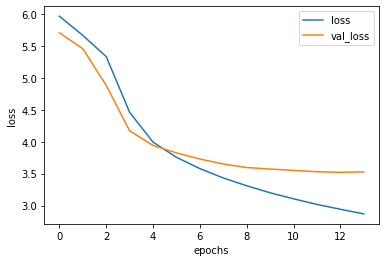

In [ ]:
# using rnn_attention and inceptionv3
import matplotlib.pyplot as plt

for label in ["loss","val_loss"]:
    plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig('models/rnn_2_inceptionv3_loss.png')
plt.show()

In [ ]:
# using rnn_2 and vgg16
loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]
print(loss_history)
print(val_loss_history)

[5.9239397048950195, 5.365537643432617, 4.64870548248291, 4.043129920959473, 3.712960720062256, 3.487694263458252, 3.3069350719451904, 3.15433931350708, 3.018089532852173, 2.90333890914917, 2.8014214038848877, 2.6971991062164307, 2.6074304580688477]
[5.610720157623291, 5.03642463684082, 4.314327239990234, 3.9924347400665283, 3.8465006351470947, 3.7754099369049072, 3.728360176086426, 3.6851725578308105, 3.667895555496216, 3.6657843589782715, 3.656430244445801, 3.660112142562866, 3.670562982559204]


In [ ]:
# using rnn_2 and inceptionv3
loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]
print(loss_history)
print(val_loss_history)

[5.8097124099731445, 5.2820916175842285, 4.576301097869873, 4.013763904571533, 3.7217330932617188, 3.515202045440674, 3.3547260761260986, 3.218768358230591, 3.103206157684326, 2.994917869567871, 2.8945090770721436, 2.8004000186920166, 2.7161383628845215, 2.6402971744537354]
[5.363034725189209, 4.986126899719238, 4.220061779022217, 3.9349193572998047, 3.771301031112671, 3.6709375381469727, 3.610193967819214, 3.5649771690368652, 3.5390639305114746, 3.5259602069854736, 3.5117011070251465, 3.4989802837371826, 3.4975192546844482, 3.504486083984375]


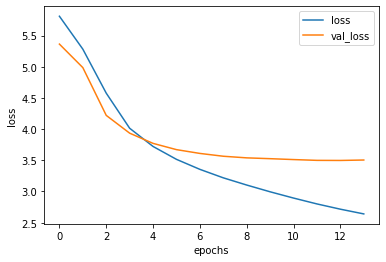

In [ ]:
# using rnn_2 and inceptionv3
import matplotlib.pyplot as plt

for label in ["loss","val_loss"]:
    plt.plot(history.history[label],label=label)
plt.legend()
plt.xlabel("epochs")
plt.ylabel("loss")
plt.savefig('rnn_2_inceptionv3_loss.png')
plt.show()

# Evaluate Model

In [ ]:
# map an integer to a word
def word_for_id(integer, tokenizer):
	for word, index in tokenizer.word_index.items():
		if index == integer:
			return word
	return None

## Sampling

In [ ]:
# generate a description for an image
def generate_desc(model, tokenizer, photo, max_length):
	# seed the generation process
	in_text = 'startseq'
	# iterate over the whole length of the sequence
	for i in range(max_length):
		# integer encode input sequence
		sequence = tokenizer.texts_to_sequences([in_text])[0]
		# pad input
		sequence = pad_sequences([sequence], maxlen=max_length)
		# predict next word
		yhat = model.predict([photo,sequence], verbose=0)
		# convert probability to integer
		yhat = argmax(yhat)
		# map integer to word
		word = word_for_id(yhat, tokenizer)
		# stop if we cannot map the word
		if word is None:
			break
		# append as input for generating the next word
		in_text += ' ' + word
		# stop if we predict the end of the sequence
		if word == 'endseq':
			break
	return in_text

## Beam Search

In [ ]:
# generate a description for an image using beam search
def generate_desc_beam_search(model, tokenizer, photo, max_length, beam_index=3):
    # seed the generation process
    in_text = [['startseq', 0.0]]
    # iterate over the whole length of the sequence
    for i in range(max_length):
        temp = []
        for s in in_text:
            # integer encode input sequence
            sequence = tokenizer.texts_to_sequences([s[0]])[0]
            # pad input
            sequence = pad_sequences([sequence], maxlen=max_length)
            # predict next words
            preds = model.predict([photo,sequence], verbose=0)
            word_preds = argsort(preds[0])[-beam_index:]
            # get top predictions
            for w in word_preds:
                next_cap, prob = s[0][:], s[1]
                # map integer to word
                word = word_for_id(w, tokenizer)
                next_cap += ' ' + word
                prob += preds[0][w]
                temp.append([next_cap, prob])

        in_text = temp
        # sorting according to the probabilities
        in_text = sorted(in_text, reverse=False, key=lambda l: l[1])
        # getting the top words
        in_text = in_text[-beam_index:]

    # get last caption text
    in_text = in_text[-1][0]
    caption_list = []
    # remove leftover endseq 
    for w in in_text.split():
        caption_list.append(w)
        if w == 'endseq':
            break
    # convert list to string
    caption = ' '.join(caption_list)
    return caption

## BLEU

In [ ]:
def calculate_scores(actual, predicted):
    # calculate BLEU score
	print('BLEU-1: %f' % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
	print('BLEU-2: %f' % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
	print('BLEU-3: %f' % corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
	print('BLEU-4: %f' % corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25, 0.25)))

In [ ]:
# evaluate the skill of the model
def evaluate_model(model, descriptions, features, tokenizer, max_length):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in tqdm(descriptions.items(), position=0, leave=True):
		# generate description
		yhat = generate_desc(model, tokenizer, features[key], max_length)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	print('Sampling:')
	calculate_scores(actual, predicted)

In [ ]:
# evaluate the skill of the model
def evaluate_model_beam_search(model, descriptions, features, tokenizer, max_length, beam_index=3):
	actual, predicted = list(), list()
	# step over the whole set
	for key, desc_list in tqdm(descriptions.items(), position=0, leave=True):
		# generate description beam search
		yhat = generate_desc_beam_search(model, tokenizer, features[key], max_length, beam_index)
		# store actual and predicted
		references = [d.split() for d in desc_list]
		actual.append(references)
		predicted.append(yhat.split())
	print('Beam Search k=%d:' % beam_index)
	calculate_scores(actual, predicted)

In [ ]:
# load the model
filename = 'models/rnn_model_2.h5'
model = load_model(filename)

In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

Sampling:
BLEU-1: 0.595796
BLEU-2: 0.369997
BLEU-3: 0.272431
BLEU-4: 0.144684


In [ ]:
# evaluate model beam_search
evaluate_model_beam_search(model, test_descriptions, test_features, tokenizer, max_length, beam_index=3)

In [ ]:
# load the model
filename = 'models/rnn_model_2_inceptionv3.h5'
model = load_model(filename)

In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

100%|██████████| 1000/1000 [09:01<00:00,  1.85it/s]


Sampling:
BLEU-1: 0.587866
BLEU-2: 0.366849
BLEU-3: 0.270134
BLEU-4: 0.144244


In [ ]:
# evaluate model beam_search
evaluate_model_beam_search(model, test_descriptions, test_features, tokenizer, max_length, beam_index=3)

 55%|█████▌    | 552/1000 [50:39<40:36,  5.44s/it]

In [ ]:
# load the model
filename = 'models/rnn_attention.h5'
model = load_model(filename)

In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

100%|██████████| 1000/1000 [06:31<00:00,  2.55it/s]


Sampling:
BLEU-1: 0.598771
BLEU-2: 0.371088
BLEU-3: 0.274687
BLEU-4: 0.149617


In [ ]:
# evaluate model
evaluate_model(model, test_descriptions, test_features, tokenizer, max_length)

100%|██████████| 1000/1000 [05:53<00:00,  2.83it/s]


Sampling:
BLEU-1: 0.580427
BLEU-2: 0.349191
BLEU-3: 0.254177
BLEU-4: 0.131738


# Generate Captions

In [ ]:
def clean_caption(caption):
    # split caption words
    caption_list = caption.split()
    # remove startseq and endseq
    caption_list = caption_list[1:len(caption_list)-1]
    # convert list to string
    caption = ' '.join(caption_list)
    return caption

## No Attention

In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
def generate_captions(model, descriptions, features, image_size, count):
    c = 0
    for key, desc_list in descriptions.items():
        # load an image from file
        filename = 'Flickr8k_Dataset/' + key + '.jpg'
        #diplay image
        display(Image(filename))
        # print original descriptions
        for i, desc in enumerate(desc_list):
            print('Original ' + str(i+1) + ': ' + clean_caption(desc_list[i]))
        # generate descriptions
        desc = generate_desc(model, tokenizer, features[key], max_length)
        desc_beam_3 = generate_desc_beam_search(model, tokenizer, features[key], max_length, beam_index=3)
        desc_beam_5 = generate_desc_beam_search(model, tokenizer, features[key], max_length, beam_index=5)
        # calculate BLEU-1 scores
        references = [d.split() for d in desc_list]
        smooth = SmoothingFunction().method4
        desc_bleu = sentence_bleu(references, desc.split(), weights=(1.0, 0, 0, 0), smoothing_function=smooth)
        desc_beam_3_bleu = sentence_bleu(references, desc_beam_3.split(), weights=(1.0, 0, 0, 0), smoothing_function=smooth)
        desc_beam_5_bleu = sentence_bleu(references, desc_beam_5.split(), weights=(1.0, 0, 0, 0), smoothing_function=smooth)
        # print descriptions with scores
        print('Sampling (BLEU-1: %f): %s' % (desc_bleu, clean_caption(desc)))
        print('Beam Search k=3 (BLEU-1: %f): %s' % (desc_beam_3_bleu, clean_caption(desc_beam_3)))
        print('Beam Search k=5 (BLEU-1: %f): %s' % (desc_beam_5_bleu, clean_caption(desc_beam_5)))
        c += 1
        if c == count:
            break

In [ ]:
# load the tokenizer
tokenizer = load(open('files/tokenizer.pkl', 'rb'))

In [ ]:
# load the model
filename = 'models/rnn_model_2.h5'
rnn_model = load_model(filename)
# using rnn_2 and vgg16 model
generate_captions(rnn_model, test_descriptions, test_features, 224, 10)

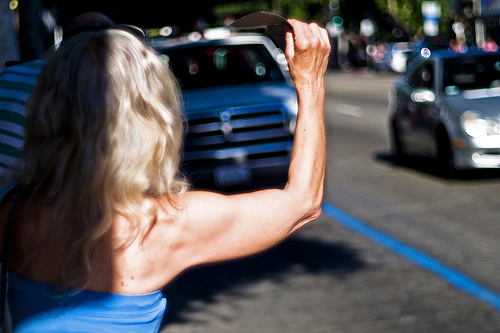

Original 1: blond woman in blue shirt appears to wait for ride
Original 2: blond woman is on the street hailing taxi
Original 3: woman is signaling is to traffic as seen from behind
Original 4: woman with blonde hair wearing blue tube top is waving on the side of the street
Original 5: the woman in the blue dress is holding out her arm at oncoming traffic
Sampling (BLEU-1: 0.666667): little girl in pink shirt is standing on the street
Beam Search k=3 (BLEU-1: 0.666667): little girl in red shirt is standing on the street
Beam Search k=5 (BLEU-1: 0.545455): little girl in green shirt is jumping on trampoline


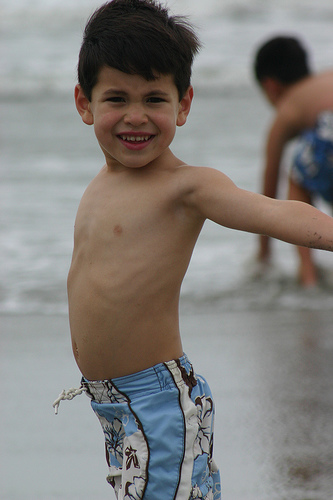

Original 1: boy in his blue swim shorts at the beach
Original 2: boy smiles for the camera at beach
Original 3: young boy in swimming trunks is walking with his arms outstretched on the beach
Original 4: children playing on the beach
Original 5: the boy is playing on the shore of an ocean
Sampling (BLEU-1: 0.666667): young boy in blue shirt is jumping into the water
Beam Search k=3 (BLEU-1: 0.857143): young boy in swimming pool
Beam Search k=5 (BLEU-1: 0.857143): young boy in swimming pool


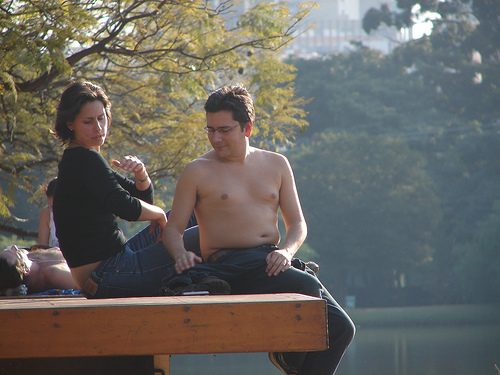

Original 1: lady and man with no shirt sit on dock
Original 2: man and woman are sitting on dock together
Original 3: man and woman sitting on dock
Original 4: man and woman sitting on deck next to lake
Original 5: shirtless man and woman sitting on dock
Sampling (BLEU-1: 0.333333): two children are standing on the edge of the water
Beam Search k=3 (BLEU-1: 0.363636): two children are standing on the edge of rock
Beam Search k=5 (BLEU-1: 0.312500): the man in the green shirt is standing on the edge of the rock


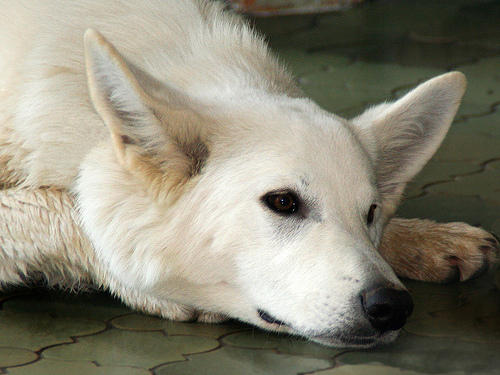

Original 1: closeup of white dog that is laying its head on its paws
Original 2: large white dog lying on the floor
Original 3: white dog has its head on the ground
Original 4: white dog is resting its head on tiled floor with its eyes open
Original 5: white dog rests its head on the patio bricks
Sampling (BLEU-1: 0.551561): dog is jumping into the water
Beam Search k=3 (BLEU-1: 0.555556): brown dog is running in the water
Beam Search k=5 (BLEU-1: 0.555556): brown dog is running through the water


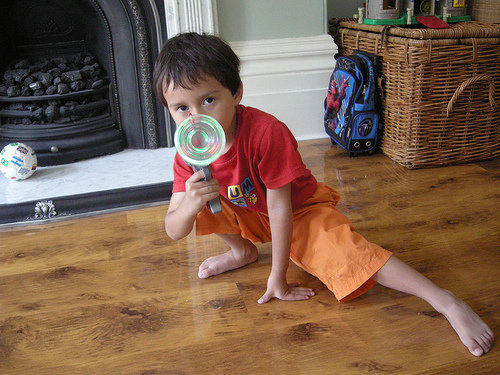

Original 1: boy with toy gun
Original 2: little boy in orange shorts playing with toy
Original 3: young boy with his foot outstretched aims toy at the camera in front of fireplace
Original 4: young child plays with his new lightup toy
Original 5: boy with toy gun pointed at the camera


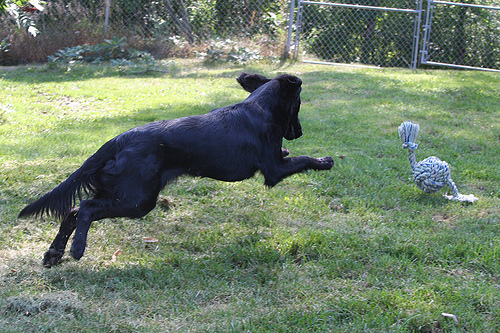

Original 1: black dog jumping to catch rope toy
Original 2: black dog playing fetch with ball of rope
Original 3: black dog pounces to get rope toy
Original 4: black dog running after his rope toy
Original 5: large black dog is playing in grassy yard
Sampling (BLEU-1: 0.551561): black dog runs in the air
Beam Search k=3 (BLEU-1: 0.777778): black dog is running in the snow
Beam Search k=5 (BLEU-1: 0.661873): black dog running in the snow


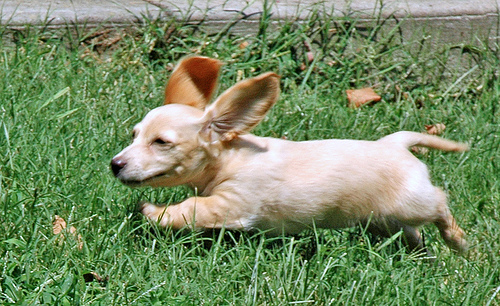

Original 1: little tan dog with large ears running through the grass
Original 2: playful dog is running through the grass
Original 3: small dogs ears stick up as it runs in the grass
Original 4: the small dog is running across the lawn
Original 5: this is small beige dog running through grassy field
Sampling (BLEU-1: 0.644123): dog runs on the grass
Beam Search k=3 (BLEU-1: 0.900000): the brown dog is running through the grass
Beam Search k=5 (BLEU-1: 0.900000): the brown dog is running through the grass


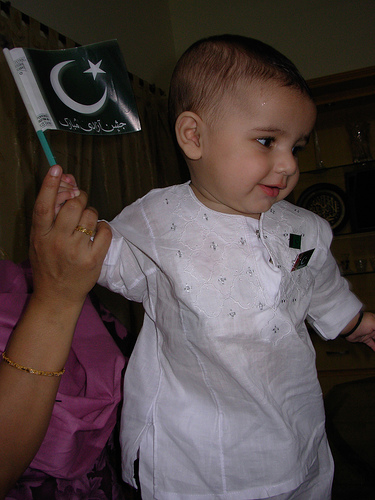

Original 1: baby in white garment holds flag with crescent moon and star
Original 2: baby is holding small black flag with moon and star on it
Original 3: baby wearing white gown waves muslim flag
Original 4: little toddler dressed in white is smiling while lady helps him wave flag
Original 5: baby in white outfit holding black and white flag
Sampling (BLEU-1: 0.545455): little girl in pink shirt is holding her arms
Beam Search k=3 (BLEU-1: 0.636364): little girl in blue shirt is playing with baby
Beam Search k=5 (BLEU-1: 0.416667): little girl in blue shirt is playing in the park


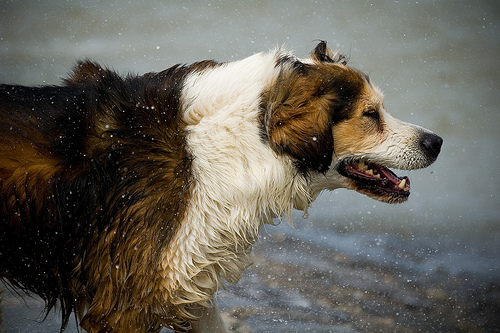

Original 1: brown and white dog stands outside while it snows
Original 2: dog is looking at something near the water
Original 3: furry dog attempts to dry itself by shaking the water off its coat
Original 4: white and brown dog shaking its self dry
Original 5: the large brown and white dog shakes off water
Sampling (BLEU-1: 0.584101): dog is running in the water
Beam Search k=3 (BLEU-1: 0.818182): brown and white dog is playing in the water
Beam Search k=5 (BLEU-1: 0.818182): brown and white dog is playing in the water


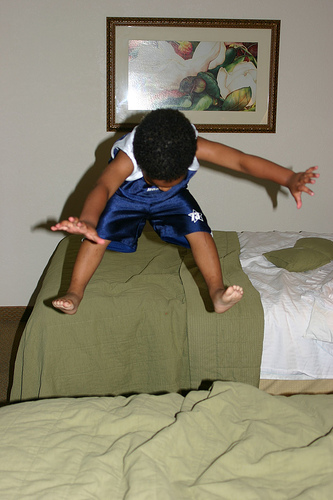

Original 1: boy is jumping on bed
Original 2: boy jumped up from the green bed
Original 3: boy jumps from one bed to another
Original 4: small child is jumping on bed
Original 5: the boy in blue shorts is bouncing on the bed
Sampling (BLEU-1: 0.375000): two children are playing in pool
Beam Search k=3 (BLEU-1: 0.375000): two children are playing on trampoline
Beam Search k=5 (BLEU-1: 0.428571): two children playing in pool


In [ ]:
# load the model
filename = 'models/rnn_attention.h5'
rnn_model = load_model(filename)
# using rnn_2 and inceptionv3 model
generate_captions(rnn_model, test_descriptions, test_features, 299, 10)

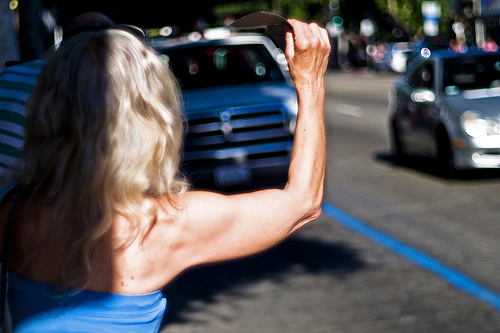

Original 1: blond woman in blue shirt appears to wait for ride
Original 2: blond woman is on the street hailing taxi
Original 3: woman is signaling is to traffic as seen from behind
Original 4: woman with blonde hair wearing blue tube top is waving on the side of the street
Original 5: the woman in the blue dress is holding out her arm at oncoming traffic
Sampling (BLEU-1: 0.500000): the boy is wearing red hat and is wearing helmet
Beam Search k=3 (BLEU-1: 0.600000): the boy is wearing red shirt and helmet
Beam Search k=5 (BLEU-1: 0.500000): young boy wearing helmet and blue shirt is wearing helmet


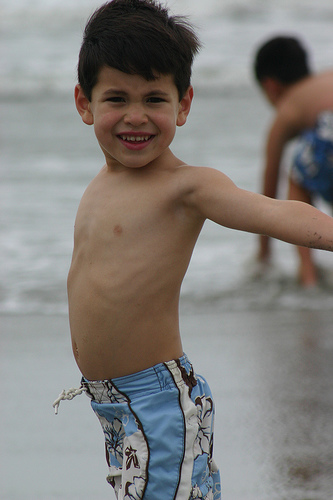

Original 1: boy in his blue swim shorts at the beach
Original 2: boy smiles for the camera at beach
Original 3: young boy in swimming trunks is walking with his arms outstretched on the beach
Original 4: children playing on the beach
Original 5: the boy is playing on the shore of an ocean
Sampling (BLEU-1: 0.636364): boy in blue shirt is standing in the water
Beam Search k=3 (BLEU-1: 0.714286): little boy in swimming pool
Beam Search k=5 (BLEU-1: 0.857143): young boy in swimming pool


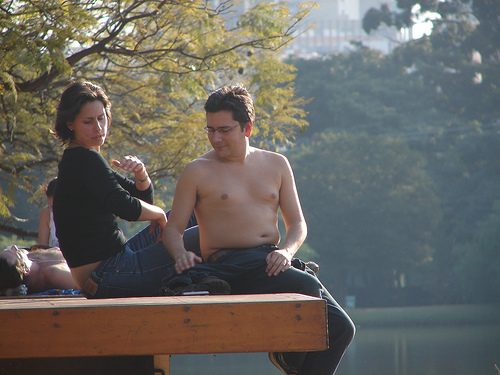

Original 1: lady and man with no shirt sit on dock
Original 2: man and woman are sitting on dock together
Original 3: man and woman sitting on dock
Original 4: man and woman sitting on deck next to lake
Original 5: shirtless man and woman sitting on dock
Sampling (BLEU-1: 0.600000): man in blue shirt is sitting on bench
Beam Search k=3 (BLEU-1: 0.400000): the man in the blue shirt is sitting on the top of rock
Beam Search k=5 (BLEU-1: 0.400000): the man in the blue shirt is sitting on the top of rock


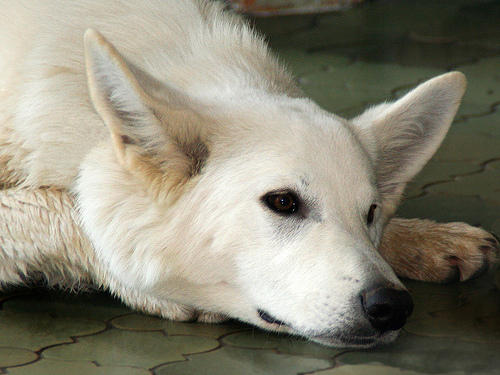

Original 1: closeup of white dog that is laying its head on its paws
Original 2: large white dog lying on the floor
Original 3: white dog has its head on the ground
Original 4: white dog is resting its head on tiled floor with its eyes open
Original 5: white dog rests its head on the patio bricks
Sampling (BLEU-1: 0.500000): dog is jumping over log in the air
Beam Search k=3 (BLEU-1: 0.600000): the white dog is running through the snow
Beam Search k=5 (BLEU-1: 0.583333): the white dog is in the middle of the snow


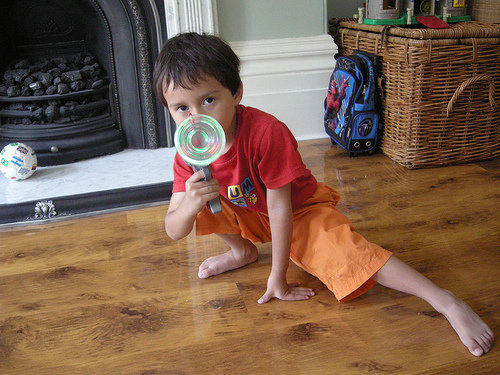

Original 1: boy with toy gun
Original 2: little boy in orange shorts playing with toy
Original 3: young boy with his foot outstretched aims toy at the camera in front of fireplace
Original 4: young child plays with his new lightup toy
Original 5: boy with toy gun pointed at the camera
Sampling (BLEU-1: 0.298280): boy is holding baby on her face
Beam Search k=3 (BLEU-1: 0.666667): the little boy is standing in front of some water
Beam Search k=5 (BLEU-1: 0.461210): the little boy in the blue shirt is playing with brown dog


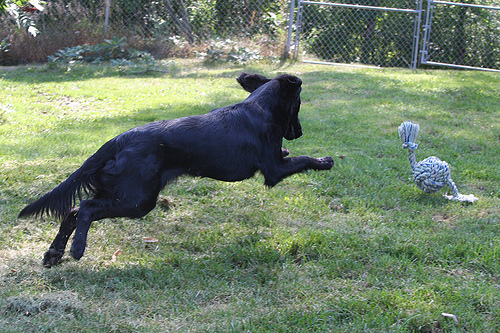

Original 1: black dog jumping to catch rope toy
Original 2: black dog playing fetch with ball of rope
Original 3: black dog pounces to get rope toy
Original 4: black dog running after his rope toy
Original 5: large black dog is playing in grassy yard
Sampling (BLEU-1: 0.666667): black dog is jumping into the air
Beam Search k=3 (BLEU-1: 0.600000): the black dog is running through the grass
Beam Search k=5 (BLEU-1: 0.600000): the black dog is running through the grass


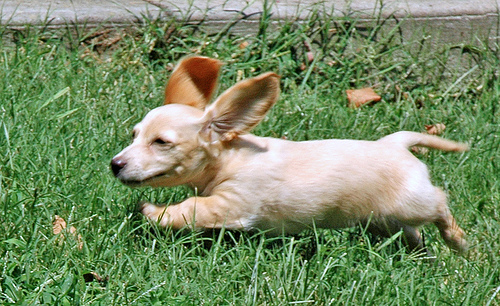

Original 1: little tan dog with large ears running through the grass
Original 2: playful dog is running through the grass
Original 3: small dogs ears stick up as it runs in the grass
Original 4: the small dog is running across the lawn
Original 5: this is small beige dog running through grassy field
Sampling (BLEU-1: 0.882497): dog is running through the grass
Beam Search k=3 (BLEU-1: 0.666667): white dog is playing with green ball in the grass
Beam Search k=5 (BLEU-1: 0.666667): white dog is playing with red ball in the grass


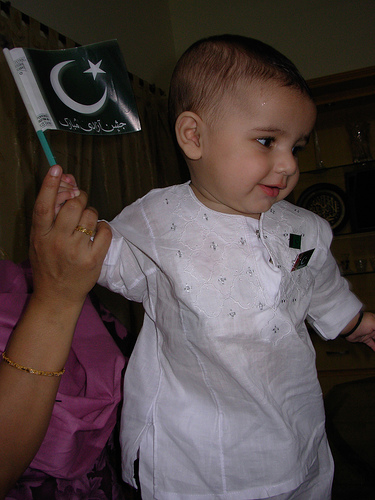

Original 1: baby in white garment holds flag with crescent moon and star
Original 2: baby is holding small black flag with moon and star on it
Original 3: baby wearing white gown waves muslim flag
Original 4: little toddler dressed in white is smiling while lady helps him wave flag
Original 5: baby in white outfit holding black and white flag
Sampling (BLEU-1: 0.454545): boy with his head is holding up his head
Beam Search k=3 (BLEU-1: 0.416667): young boy is holding spoon in front of brick wall
Beam Search k=5 (BLEU-1: 0.545455): little boy in blue shirt is playing with bubble


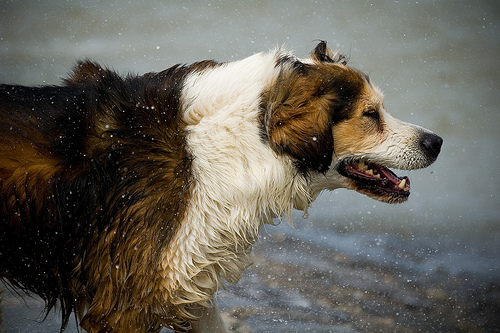

Original 1: brown and white dog stands outside while it snows
Original 2: dog is looking at something near the water
Original 3: furry dog attempts to dry itself by shaking the water off its coat
Original 4: white and brown dog shaking its self dry
Original 5: the large brown and white dog shakes off water
Sampling (BLEU-1: 0.584101): dog is swimming in the water
Beam Search k=3 (BLEU-1: 0.727273): white and white dog is swimming in the water
Beam Search k=5 (BLEU-1: 0.700000): brown and white dog swims in shallow water


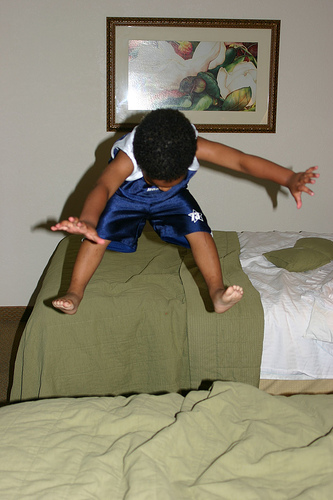

Original 1: boy is jumping on bed
Original 2: boy jumped up from the green bed
Original 3: boy jumps from one bed to another
Original 4: small child is jumping on bed
Original 5: the boy in blue shorts is bouncing on the bed
Sampling (BLEU-1: 0.500000): two children are sitting on bed
Beam Search k=3 (BLEU-1: 0.664073): young boy in blue shirt is sitting on bed
Beam Search k=5 (BLEU-1: 0.664073): little boy in blue shirt is sitting on bed


In [ ]:
# load the model
filename = 'models/rnn_model_2_inceptionv3.h5'
rnn_model = load_model(filename)
# using rnn_2 and inceptionv3 model
generate_captions(rnn_model, test_descriptions, test_features, 299, 10)

## Attention